In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statistics as es 
import csv
import re 
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)





## ENEM  DATASET

In [2]:
#Choose just useful features for us 
fenem= ['NU_INSCRICAO','CO_ESCOLA','Q001','Q002','Q003','Q004','Q005','Q006', 'Q007', 'Q008', 'Q009', 'Q010', 
        'Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025',
        'Q026','Q027', 'TP_COR_RACA',
        'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
       'IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO','TP_ESTADO_CIVIL', 'TP_NACIONALIDADE', 'TP_SEXO', 
        'NU_IDADE']
enem17a=pd.read_csv("~/data/Enem/MICRODADOS_ENEM_2017.csv", sep=';',encoding="iso-8859-2", usecols = fenem)
enem18a=pd.read_csv("~/data/Enem/MICRODADOS_ENEM_2018.csv", sep=';',encoding="iso-8859-2", usecols = fenem)

In [3]:
#category=(['TP_COR_RACA'])
#enem17a[category]= enem17a[category].astype('object')
#enem18a[category]= enem17a[category].astype('object')

In [6]:
e17 = enem17a.copy()
e18 = enem18a.copy()


In [7]:
print ("There are", e18.shape[0], "students",  "of", e18.CO_ESCOLA.value_counts().count() ,"Schools in ENEM 2018")
#enem18.head()

There are 5513747 students of 32253 Schools in ENEM 2018


## SCHOOL CENSUS DATASET

In [8]:
fcenso= ['CO_ENTIDADE','IN_AGUA_INEXISTENTE','IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE',
         'IN_SALA_DIRETORIA','IN_EQUIP_TV','IN_COMPUTADOR','IN_EQUIP_IMPRESSORA', 'IN_EQUIP_DVD', ]
censo17a=pd.read_csv("~/data/censo2017/ESCOLAS.CSV", sep='|', encoding="iso-8859-2", usecols=fcenso)
censo18a=pd.read_csv("~/data/censo2018/ESCOLAS.CSV", sep='|', encoding="iso-8859-2", usecols=fcenso)


In [9]:
c17 = censo17a.copy()
c18 = censo18a.copy()

In [10]:
print ("There are", c18.shape[0], "schools in CENSO 2018")

There are 286014 schools in CENSO 2018


In [11]:
#censo18.loc[censo18.IN_AGUA_INEXISTENTE.isnull()==True].head()

#### Join dataset in student grain for scope filtering

In [12]:
#Students without schools is useless
print("Will be dropped out" , (e18.CO_ESCOLA.isnull()).sum(), 'who does have school enrollment')
e17.dropna(inplace = True, axis=0, subset=['CO_ESCOLA'])
e18.dropna(inplace = True, axis=0, subset=['CO_ESCOLA'])

Will be dropped out 4064926 who does have school enrollment


In [13]:
#Join datasets
enem17 = pd.merge(e17, c17, left_on='CO_ESCOLA', right_on='CO_ENTIDADE', how='left')
enem17.drop('CO_ENTIDADE', inplace = True, axis=1)
enem18 = pd.merge(e18, c18, left_on='CO_ESCOLA', right_on='CO_ENTIDADE', how='left')
enem18.drop('CO_ENTIDADE', inplace = True, axis=1)


## DOMAIN FILTER

In [14]:
#Will disconsider null values in domain filter. There is an insignificant size injust one feature
filters = (['IN_TREINEIRO','TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'TP_NACIONALIDADE', 'Q027'])
enem18[filters].isnull().sum()

IN_TREINEIRO          0
TP_ST_CONCLUSAO       0
TP_ESCOLA             0
TP_ENSINO           175
TP_NACIONALIDADE      0
Q027                  0
dtype: int64

In [15]:
print("Will be dropped more" , (enem18.IN_TREINEIRO == 1).sum(), 'who are just trainning')
enem17 = enem17.loc[(enem17.IN_TREINEIRO !=1)]
enem18 = enem18.loc[(enem18.IN_TREINEIRO !=1)]
print("more..." , (enem18.TP_ST_CONCLUSAO!= 2).sum(), 'who aren´t on last secoNdary school year')
enem17 = enem17.loc[(enem17.TP_ST_CONCLUSAO==2)]
enem18 = enem18.loc[(enem18.TP_ST_CONCLUSAO==2)]               
print("little bit more..." , (enem18.TP_ESCOLA!=2).sum(), 'who does not study in public school ')
enem17 = enem17.loc[(enem17.TP_ESCOLA==2)]
enem18 = enem18.loc[(enem18.TP_ESCOLA==2)]   
print(" Public school in all secondary level..." ,(enem18.Q027!='A').sum())
enem17 = enem17.loc[(enem17.Q027=='A')]
enem18 = enem18.loc[(enem18.Q027=='A')]     
print("more one filter:" , (enem18.TP_ENSINO !=1).sum(), 'who does not have regular curriculum')
enem17 = enem17.loc[(enem17.TP_ENSINO ==1)]              
enem18 = enem18.loc[(enem18.TP_ENSINO ==1)]
enem18.TP_NACIONALIDADE
print("the last:" , (enem18.TP_NACIONALIDADE ==3).sum(), 'who are foreign')
enem17 = enem17.loc[(enem17.TP_NACIONALIDADE !=3)]              
enem18 = enem18.loc[(enem18.TP_NACIONALIDADE !=3)]

#drop that columns
#enem17.drop(['IN_TREINEIRO','TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'TP_NACIONALIDADE', 'Q027'], axis=1, inplace=True)
#enem18.drop(['IN_TREINEIRO','TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'TP_NACIONALIDADE', 'Q027'], axis=1, inplace=True)

Will be dropped more 0 who are just trainning
more... 0 who aren´t on last secoNdary school year
little bit more... 311330 who does not study in public school 
 Public school in all secondary level... 97274
more one filter: 119839 who does not have regular curriculum
the last: 897 who are foreign


In [16]:
                                                      #Second, drop out insufficient scores 
fields = (['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO'])
# With NaN
print(enem18[fields].isnull().sum())
enem17.dropna(inplace = True, axis=0, subset=fields)
enem18.dropna(inplace = True, axis=0, subset=fields)
# With 0
print((enem18[fields] ==0).sum())
enem17 = enem17.loc[~(enem17[fields] == 0).any(axis=1)]
enem18 = enem18.loc[~(enem18[fields] == 0).any(axis=1)]

NU_NOTA_CN         214765
NU_NOTA_CH         172540
NU_NOTA_LC         172540
NU_NOTA_MT         214765
NU_NOTA_REDACAO    172540
dtype: int64
NU_NOTA_CN            85
NU_NOTA_CH           942
NU_NOTA_LC           348
NU_NOTA_MT           128
NU_NOTA_REDACAO    21064
dtype: int64


In [17]:
print("Remainning: ",enem18.shape[0])
enem18[fields].describe()

Remainning:  680583


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,680583.000000,680583.000000,680583.000000,680583.000000,680583.000000
mean,473.309700,548.759617,508.634275,510.961322,489.294443
std,60.220655,72.124431,66.411759,83.392723,153.197797
min,362.500000,318.700000,318.800000,360.300000,40.000000
25%,425.900000,490.900000,461.500000,447.300000,360.000000
50%,465.400000,556.900000,512.000000,498.700000,500.000000
75%,515.100000,607.700000,558.600000,561.800000,600.000000
max,769.400000,820.200000,792.800000,988.800000,980.000000


In [18]:
#Only schools that have more than ten students in ENEM 1
enem17['STUDENT_COUNT'] = enem17.groupby(['CO_ESCOLA'])['CO_ESCOLA'].transform('count') 
enem17 = enem17[(enem17['STUDENT_COUNT']>= 10)]
#enem17.drop(['STUDENT_COUNT'], axis=1,inplace=True)

enem18['STUDENT_COUNT'] = enem18.groupby(['CO_ESCOLA'])['CO_ESCOLA'].transform('count') 
print("will drop more:", (enem18.STUDENT_COUNT <10).sum())
enem18 = enem18[(enem18['STUDENT_COUNT']>= 10)]
#enem18.drop(['STUDENT_COUNT'], axis=1,inplace=True)

will drop more: 22078


In [19]:
#How many do not have elementary infraetructure?
temp = enem18.drop_duplicates('CO_ESCOLA')
elementary = (temp.IN_AGUA_INEXISTENTE==1.0)  | (temp.IN_ESGOTO_INEXISTENTE==1.0) | (temp.IN_ENERGIA_INEXISTENTE==1.0)
print ((temp[(elementary)]['CO_ESCOLA'].count()/temp.shape[0])*100,"% do not have elementary infrastructre")

0.69708054386086 % do not have elementary infrastructre


In [20]:
#and basic infrasestructure?

print ((temp[(elementary)& (temp.IN_SALA_DIRETORIA!=1.0)  | (temp.IN_EQUIP_TV!=1.0) | 
        (temp.IN_COMPUTADOR!=1.0)| (temp.IN_EQUIP_IMPRESSORA!=1.0)| 
        (temp.IN_EQUIP_DVD!=1.0)]['CO_ESCOLA'].count()/temp.shape[0])*100, "% do not have elemantary + basic infraestructure")

38.77424252881496 % do not have elemantary + basic infraestructure


In [21]:
#Filtering school that have not elementary infraestructure
filter_elementary = (['IN_AGUA_INEXISTENTE','IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE'])
filter_basic = (['IN_SALA_DIRETORIA', 'IN_EQUIP_TV', 'IN_COMPUTADOR', 'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_DVD' ])
print(enem18[filter_elementary].isnull().sum())
enem17.dropna(inplace = True, axis=0, subset=filter_elementary)
enem18.dropna(inplace = True, axis=0, subset=filter_elementary)
#filter_basic = (['IN_SALA_DIRETORIA','IN_EQUIP_TV','IN_COMPUTADOR','IN_EQUIP_IMPRESSORA', 'IN_EQUIP_DVD'])
print((enem18[filter_elementary] ==1.0).sum())
enem17 = enem17.loc[~(enem17[filter_elementary] == 1.0).any(axis=1)]
enem18 = enem18.loc[~(enem18[filter_elementary] == 1.0).any(axis=1)]
#dataset[filter_basic] = dataset[filter_basic].astype(str)

#Drop this features
#enem17.drop(filter_elementary, axis=1, inplace=True)
#enem18.drop(filter_elementary, axis=1, inplace=True)

#It will not used. Have a large ammout that have not a basic infrastructure
#enem17.drop(filter_basic, axis=1, inplace=True)
#enem18.drop(filter_basic, axis=1, inplace=True)





IN_AGUA_INEXISTENTE       277
IN_ENERGIA_INEXISTENTE    277
IN_ESGOTO_INEXISTENTE     277
dtype: int64
IN_AGUA_INEXISTENTE       1123
IN_ENERGIA_INEXISTENTE      29
IN_ESGOTO_INEXISTENTE     3286
dtype: int64


In [22]:
print(enem17.shape)
print(enem18.shape)

(891466, 52)
(653848, 52)


#### Set last quartile of average scores as the best students for the 2017 dataset

In [23]:
#Creating average of students in all fields
enem17['AVG_SCORE'] = (enem17.NU_NOTA_CN + enem17.NU_NOTA_CH + enem17.NU_NOTA_LC + enem17.NU_NOTA_MT + enem17.NU_NOTA_REDACAO)/5
enem18['AVG_SCORE'] = (enem18.NU_NOTA_CN + enem18.NU_NOTA_CH + enem18.NU_NOTA_LC + enem18.NU_NOTA_MT + enem18.NU_NOTA_REDACAO)/5

#drop this unnecessary features
enem17.drop(fields, axis=1, inplace=True)
enem18.drop(fields, axis=1, inplace=True)

In [24]:
#Creating the average of all schools by each studentes score
enem17['AVG_SCORE_SCHOOL'] = enem17.groupby(['CO_ESCOLA'])['AVG_SCORE'].transform('mean') 
enem18['AVG_SCORE_SCHOOL'] = enem18.groupby(['CO_ESCOLA'])['AVG_SCORE'].transform('mean') 

#drop unnecessary features
#enem17.drop('AVG_SCORE', axis=1, inplace = True)
#enem18.drop('AVG_SCORE', axis=1, inplace = True)


In [25]:
#Transform in School grain before to separate the scores in quartiles
temp17 = enem17.drop_duplicates(['CO_ESCOLA'])
temp17['TARGET'] = pd.qcut (temp17.AVG_SCORE_SCHOOL, 4, labels = [1,2,3,4]).map(lambda x : 0 if x!=4 else 1) 

temp18 = enem18.drop_duplicates(['CO_ESCOLA'])
temp18['TARGET'] = pd.qcut (temp18.AVG_SCORE_SCHOOL, 4, labels = [1,2,3,4]).map(lambda x : 0 if x!=4 else 1) 

#drop unnecessary features
enem17.drop('AVG_SCORE_SCHOOL', axis=1, inplace = True)
enem18.drop('AVG_SCORE_SCHOOL', axis=1, inplace = True)

In [26]:
#It's right? 
print((temp17.TARGET==0).sum()/(temp17.TARGET.count())*100, '% lowers quartis in ENEM 2017')
print((temp18.TARGET==0).sum()/(temp18.TARGET.count())*100, '% lowers quartis in ENEM 2018')

75.00157143755108 % lowers quartis in ENEM 2017
75.0 % lowers quartis in ENEM 2018


In [27]:
print(temp17.shape)
print(temp18.shape)

(15909, 50)
(14376, 50)


In [28]:
#turn back in Student grain
enem17= pd.merge(temp17[['CO_ESCOLA', 'TARGET']], enem17, left_on='CO_ESCOLA', right_on='CO_ESCOLA', how='right')
enem18= pd.merge(temp18[['CO_ESCOLA', 'TARGET']], enem18, left_on='CO_ESCOLA', right_on='CO_ESCOLA', how='right')

In [29]:
#check if the same length as before
print(enem17.shape)
print(enem18.shape)

(891466, 49)
(653848, 49)


In [30]:
#Due to known low variance , we will disregard this feature
print("No single, only ",(enem18.loc[enem18.TP_ESTADO_CIVIL!=0].count()[0]/enem18.shape[0]*100),'%')

enem17.drop('TP_ESTADO_CIVIL', axis=1, inplace = True)
enem18.drop('TP_ESTADO_CIVIL', axis=1, inplace = True)

No single, only  2.583016236189451 %


In [31]:
#missing value
k= pd.DataFrame()
k['miss'] = enem17.isnull().sum()
k.T


,CO_ESCOLA,TARGET,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,IN_AGUA_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_SALA_DIRETORIA,IN_EQUIP_TV,IN_EQUIP_DVD,IN_EQUIP_IMPRESSORA,IN_COMPUTADOR,STUDENT_COUNT,AVG_SCORE
miss,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#Resolving missing value in 2017 dataset.
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)
            
missing_value(enem17)


In [33]:
#It's a good idea categorize this feature
print("less than 16 years old ",enem17.loc[enem17.NU_IDADE<16].count()[0]/enem17.shape[0]*100,'%')
print("_________________ ")
print("less than 17 anos ",enem17.loc[enem17.NU_IDADE<17].count()[0]/enem17.shape[0]*100,'%')
print("17 years old ",enem17.loc[enem17.NU_IDADE==17].count()[0]/enem17.shape[0]*100,'%')
print("18 years old",enem17.loc[enem17.NU_IDADE==18].count()[0]/enem17.shape[0]*100,'%')
print("19 years old",enem17.loc[enem17.NU_IDADE==19].count()[0]/enem17.shape[0]*100,'%')
print("More than 19 years old ",enem17.loc[enem17.NU_IDADE>19].count()[0]/enem17.shape[0]*100,'%')
print("_________________ ")
print("More than 20 years old",enem17.loc[enem17.NU_IDADE>20].count()[0]/enem17.shape[0]*100,'%')

less than 16 years old  0.0796440918666556 %
_________________ 
less than 17 anos  3.3496510242678914 %
17 years old  48.41452169796717 %
18 years old 33.670717671790065 %
19 years old 8.959960334998755 %
More than 19 years old  5.605149270976122 %
_________________ 
More than 20 years old 2.677275409269675 %


In [34]:
def categorize_idade(df):
    
                        # bin ranges 16(<17), 17 , 18, 19, 20(>19) 
    if df.NU_IDADE <17:
        return 16
   
    elif df.NU_IDADE >19:
        return 20
    else:
        return df.NU_IDADE
    

In [35]:
enem17.NU_IDADE = enem17.apply(categorize_idade, axis=1)
enem18.NU_IDADE = enem18.apply(categorize_idade, axis=1)

In [36]:
#How was it?
print("less than 16 years old",enem17.loc[enem17.NU_IDADE<16].count()[0]/enem17.shape[0]*100,'%')
print("_________________ ")
print("less than 17 anos",enem17.loc[enem17.NU_IDADE<17].count()[0]/enem17.shape[0]*100,'%')
print("17 years old",enem17.loc[enem17.NU_IDADE==17].count()[0]/enem17.shape[0]*100,'%')
print("18 years old",enem17.loc[enem17.NU_IDADE==18].count()[0]/enem17.shape[0]*100,'%')
print("19 years old",enem17.loc[enem17.NU_IDADE==19].count()[0]/enem17.shape[0]*100,'%')
print("More than 19 years old",enem17.loc[enem17.NU_IDADE>19].count()[0]/enem17.shape[0]*100,'%')
print("_________________ ")
print("More than 20 years old",enem17.loc[enem17.NU_IDADE>20].count()[0]/enem17.shape[0]*100,'%')

less than 16 years old 0.0 %
_________________ 
less than 17 anos 3.3496510242678914 %
17 years old 48.41452169796717 %
18 years old 33.670717671790065 %
19 years old 8.959960334998755 %
More than 19 years old 5.605149270976122 %
_________________ 
More than 20 years old 0.0 %


#### Check again that remaining examples conform to the domain filter rules

In [37]:
features_filter_cat = (['IN_TREINEIRO','TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO', 'TP_NACIONALIDADE', 'Q027', 'Q026',
                   'IN_AGUA_INEXISTENTE','IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE'])
features_filter_num = ([ 'STUDENT_COUNT','AVG_SCORE'])  

In [38]:
enem18[features_filter_cat].astype('category').describe()

,IN_TREINEIRO,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,TP_NACIONALIDADE,Q027,Q026,IN_AGUA_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE
count,653848,653848,653848,653848.0,653848,653848,653848,653848.0,653848.0,653848.0
unique,1,1,1,1.0,4,1,1,1.0,1.0,1.0
top,0,2,2,1.0,1,A,B,0.0,0.0,0.0
freq,653848,653848,653848,653848.0,628410,653848,653848,653848.0,653848.0,653848.0


In [39]:
enem18.TP_NACIONALIDADE.value_counts()

1    628410
2     23812
4      1416
0       210
Name: TP_NACIONALIDADE, dtype: int64

In [40]:
enem18[features_filter_num].describe()

,STUDENT_COUNT,AVG_SCORE
count,653848.000000,653848.000000
mean,83.127620,506.925798
std,69.943546,66.333645
min,10.000000,316.880000
25%,36.000000,455.940000
50%,64.000000,499.940000
75%,107.000000,550.780000
max,555.000000,811.680000


In [41]:
# This faetures are are no longer necessary
enem18.drop(features_filter_num + features_filter_cat + filter_basic, axis=1, inplace = True)

In [42]:
## keep a copy of schools filtered to AED
enem18[['NU_INSCRICAO']].to_csv('students_filtered.csv', index=False)

## TEACHERS CENSUS DATASET 

In [43]:
#Choose just useful features for us now, improve memory use
fcenso = ['CO_PESSOA_FISICA','NU_ANO_CENSO','IN_ESPECIALIZACAO','IN_MESTRADO','IN_DOUTORADO','CO_ENTIDADE']

#Reading data of Teachers in Censo 2017
CO17=pd.read_csv("~/data/censo2017/DOCENTES_CO.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso)
NE17=pd.read_csv("~/data/censo2017/DOCENTES_NORDESTE.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso)
NT17=pd.read_csv("~/data/censo2017/DOCENTES_NORTE.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso)
SE17=pd.read_csv("~/data/censo2017/DOCENTES_SUDESTE.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso)
SU17=pd.read_csv("~/data/censo2017/DOCENTES_SUL.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso)

#There are differences in feature names
fcenso18 = ['ID_DOCENTE','NU_ANO_CENSO','IN_ESPECIALIZACAO','IN_MESTRADO','IN_DOUTORADO','CO_ENTIDADE']

CO18=pd.read_csv("~/data/censo2018/DOCENTES_CO.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso18)
NE18=pd.read_csv("~/data/censo2018/DOCENTES_NORDESTE.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso18)
NT18=pd.read_csv("~/data/censo2018/DOCENTES_NORTE.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso18)
SE18=pd.read_csv("~/data/censo2018/DOCENTES_SUDESTE.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso18)
SU18=pd.read_csv("~/data/censo2018/DOCENTES_SUL.CSV", sep='|', encoding="iso-8859-2", usecols = fcenso18)


In [44]:
#Concatening the subsets and creating a unique dataset, than transform all features and categories, as it are.
censo17a= pd.concat([CO17, NE17, NT17, SE17, SU17])
scenso17 = censo17a.copy()

censo18a= pd.concat([CO18, NE18, NT18, SE18, SU18])
scenso18 = censo18a.copy()
#censo17=censo17.astype('category')

Get only teachers who work in secondary schools (based on ENEM)

In [45]:
#Some informations
print ("There are", scenso17.drop_duplicates('CO_PESSOA_FISICA').shape[0], "Teachers",  "at", scenso17.CO_ENTIDADE.value_counts().count() ,"Schools in Census 2017")

print ("There are", scenso18.drop_duplicates('ID_DOCENTE').shape[0], "Teachers",  "at", scenso18.CO_ENTIDADE.value_counts().count() ,"Schools in Census 2018")

There are 2603186 Teachers at 185925 Schools in Census 2017
There are 2581297 Teachers at 183746 Schools in Census 2018


In [46]:
#It's necessary drop duplicates whose are teachers in the same school but in different classes. 
#This way, the teacher appear just one time in each school. 
scenso17.drop_duplicates(subset=['CO_PESSOA_FISICA', 'CO_ENTIDADE'], inplace=True)
scenso18.drop_duplicates(subset=['ID_DOCENTE', 'CO_ENTIDADE'], inplace=True)

In [47]:
scenso18.shape[0]

3240084

In [48]:
#getting the schools represented in ENEM
schoolsEnem17 = enem17.drop_duplicates('CO_ESCOLA')
schoolsEnem17 = schoolsEnem17[(['CO_ESCOLA','TARGET'])]
#schoolsEnem17 = schoolsEnem17.astype(str)

schoolsEnem18 = enem18.drop_duplicates('CO_ESCOLA')
schoolsEnem18 = schoolsEnem18[(['CO_ESCOLA','TARGET'])]
#schoolsEnem18 = schoolsEnem18.astype(str)


In [49]:
schoolsEnem18.shape[0]

14376

In [50]:
#Merge the two datasets, whereas that only teachers who work in school represented in ENEM 17 and 18
censo17= pd.merge(schoolsEnem17, scenso17, left_on='CO_ESCOLA', right_on='CO_ENTIDADE', how='left')

censo18= pd.merge(schoolsEnem18, scenso18, left_on='CO_ESCOLA', right_on='CO_ENTIDADE', how='left')

In [51]:
#There are 807 null degrees to teachers. I will drop it, because, is the same number of all. It's clear that is a mistake.
censo18.drop_duplicates('CO_ENTIDADE').isnull().sum()

CO_ESCOLA              0
TARGET                 0
NU_ANO_CENSO           0
ID_DOCENTE             0
IN_ESPECIALIZACAO    796
IN_MESTRADO          796
IN_DOUTORADO         796
CO_ENTIDADE            0
dtype: int64

In [52]:
#25% of nulls are from first quartil.
censo18.drop_duplicates('CO_ESCOLA').loc[(censo18.IN_ESPECIALIZACAO.isnull() == True)]['TARGET'].value_counts()

0    609
1    187
Name: TARGET, dtype: int64

In [53]:
#Missing values in these cases are "0" 
censo17['IN_ESPECIALIZACAO'].fillna(0.0, inplace=True)
censo17['IN_MESTRADO'].fillna(0.0, inplace=True)
censo17['IN_DOUTORADO'].fillna(0.0, inplace=True)

censo18['IN_ESPECIALIZACAO'].fillna(0.0, inplace=True)
censo18['IN_MESTRADO'].fillna(0.0, inplace=True)
censo18['IN_DOUTORADO'].fillna(0.0, inplace=True)

In [57]:
#In database have different patterns to represent level of education. ex: Master has signed in two different ways, or marked in Master and Especialization or just in Master.
def education_level(df):
    if (df.IN_ESPECIALIZACAO==0.0) & (df.IN_MESTRADO==0.0) & (df.IN_DOUTORADO ==0.0):
        #print(0)
        df['TITULACAO']= "BSc"
    elif (df.IN_ESPECIALIZACAO==1.0) & (df.IN_MESTRADO==0.0) & (df.IN_DOUTORADO ==0.0):
        #print(1)
        df['TITULACAO']= "MBA"
    elif (df.IN_ESPECIALIZACAO==1.0) & (df.IN_MESTRADO==1.0) & (df.IN_DOUTORADO ==0.0):
        #print(2)
        df['TITULACAO']= "MSc"
    elif (df.IN_ESPECIALIZACAO==0.0) & (df.IN_MESTRADO==1.0) & (df.IN_DOUTORADO ==0.0):
        #print(2)
        df['TITULACAO']= "MSc"
    else:
        #print(3)
        df['TITULACAO']= "PhD"  
    return df

In [58]:
censo17=censo17.apply(education_level, axis=1)

censo18=censo18.apply(education_level, axis=1)

Text(0, 0.5, 'Count')

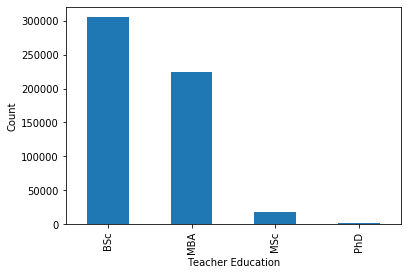

In [60]:
ax1 =censo18.TITULACAO.value_counts().plot(kind='bar')
ax1.set_xlabel("Teacher Education")
ax1.set_ylabel("Count")

In [55]:
censo17.head(2)

,CO_ESCOLA,TARGET,NU_ANO_CENSO,CO_PESSOA_FISICA,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,CO_ENTIDADE,TITULACAO
0,35001259.0,0.0,2017.0,1.151817e+11,1.0,0.0,0.0,35001259.0,1
1,35001259.0,0.0,2017.0,1.222428e+11,1.0,0.0,0.0,35001259.0,1


In [56]:
censo18.head(2)

,CO_ESCOLA,TARGET,NU_ANO_CENSO,ID_DOCENTE,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,CO_ENTIDADE,TITULACAO
0,23077140.0,0,2018,00E3AA8026744AEEC6D35E11B082B9D9,0.0,0.0,0.0,23077140,0
1,23077140.0,0,2018,0FA5A09CB34A5FEC043158EE31F812F6,0.0,0.0,0.0,23077140,0


## Grain Transformation 

##### We will transform the Categorical ENEM database features from student grain to school grain (Decision Grain).  Instead the pratical use of MODE, it will use the regression on the attribute distribution, having its histogram relative frequencies as input and the  decision level TARGET as output.  

In [58]:
#transform ordered categorical features in numeric. This feature will be it means in the new grain.
ordered_categorical = ['Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q019',
        'Q022', 'Q024']

for i in ordered_categorical:
    codes, uniques = pd.factorize(enem18[i], sort=True)
    enem18[i] = codes


In [59]:
#Creating the dataframe with the relative frequencies and target. Ready to applying regression
def relative_frequencies(df, colum):
    root = (['CO_ESCOLA', 'TARGET'])
    df = df [root + [colum]]
    df = pd.get_dummies(df, columns=[colum])
    filter_col = [col for col in df if col.startswith(colum)]
    print (filter_col)
    for x in filter_col:            
        df[x] = df.groupby(df['CO_ESCOLA'])[x].transform(sum)/ df.groupby(df['CO_ESCOLA'])[x].transform('count')
        
    return df

In [60]:
def LR_student_to_school (df1, df2, columns):
    result = pd.DataFrame()
            
    for x in columns:
            temp = relative_frequencies(df1,df1[x].name)
            temp.drop_duplicates('CO_ESCOLA', inplace=True)
            temp = temp.loc[:, ~temp.columns.isin(['CO_ESCOLA'])]
            temp_DATA = temp.loc[:, temp.columns != 'TARGET']
            temp_TARGET = temp.loc[:, temp.columns == 'TARGET']

    
            LR_temp = LogisticRegression()
            LR_temp.fit(temp_DATA, temp_TARGET)
      
       
        
            temp = relative_frequencies(df2,df2[x].name)
            temp.drop_duplicates('CO_ESCOLA', inplace=True) 
            temp = temp.reset_index(drop=True)
            temp2 = temp.loc[:, ~temp.columns.isin(['CO_ESCOLA'])]
            temp_DATA = temp2.loc[:, temp2.columns != 'TARGET']
        
            result[x] = LR_temp.predict_proba(temp_DATA)[:,1]
                       
       
    result = pd.merge(result, temp.CO_ESCOLA, left_index=True, right_index=True)
    
    return result, LR_temp

 #col = df.select_dtypes(include=['object'])

In [61]:
#def category_type(df):
#    col = df.select_dtypes(include=['category'])
#    category_features = []
#    for i in col:
#        df[i] = df[i].astype('object')
#        category_features.append(i)
            
#    return category_features
           
#category_type(enem17)
#category_features = category_type(enem18)
col = enem18.select_dtypes(include=['object'])


In [62]:
#category_features = enem18.select_dtypes(include=['category']).columns
cols = enem18.loc[:, enem18.nunique() >2].select_dtypes(include=['object']).columns
trans_enem_att, lr_model =LR_student_to_school(enem17, enem18, cols)


['Q001_A', 'Q001_B', 'Q001_C', 'Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H']
['Q001_A', 'Q001_B', 'Q001_C', 'Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H']
['Q002_A', 'Q002_B', 'Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H']
['Q002_A', 'Q002_B', 'Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H']
['Q003_A', 'Q003_B', 'Q003_C', 'Q003_D', 'Q003_E', 'Q003_F']
['Q003_A', 'Q003_B', 'Q003_C', 'Q003_D', 'Q003_E', 'Q003_F']
['Q004_A', 'Q004_B', 'Q004_C', 'Q004_D', 'Q004_E', 'Q004_F']
['Q004_A', 'Q004_B', 'Q004_C', 'Q004_D', 'Q004_E', 'Q004_F']
['Q006_A', 'Q006_B', 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H', 'Q006_I', 'Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q']
['Q006_A', 'Q006_B', 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H', 'Q006_I', 'Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q']
['Q007_A', 'Q007_B', 'Q007_C', 'Q007_D']
['Q007_A', 'Q007_B', 'Q007_C', 'Q007_D']


In [63]:
#Other features in student grain, will be transformed by frequencie of one class, in binary features case 
#and mean to ones that numerical in average. In this case will be used the Enem18
def other_transformations (df, df2): 
    other_cols = df.loc[:, df.columns.isin(df2.columns)== False].columns.to_list()
    for x in other_cols:
    
        if (df[x].nunique()==2)&(df[x].name!='TARGET'):   
            df[x] = df[x].astype('category')
            print (x, "binary")
            
            temp = df.groupby('CO_ESCOLA', sort=False)[x].value_counts(ascending=False, 
                                                                normalize=True).unstack().fillna(0).iloc[:,0]#Get the  relative Frrquency     
            df2 = pd.merge(df2,temp,left_on='CO_ESCOLA', right_on='CO_ESCOLA')
            df2.rename(columns={ df2.columns[-1]: x }, inplace = True)
                        

            
        elif(df[x].nunique()>2) & (df[x].name!='NU_INSCRICAO'):
            df2 = df2.reset_index(drop=True)
            temp =df.groupby(['CO_ESCOLA'])[x].mean()
            df2 = pd.merge(df2,temp,left_on='CO_ESCOLA', right_on='CO_ESCOLA')
            df2.rename(columns={ df2.columns[-1]: x }, inplace = True)
            
            print (x, "mean")
            
        else:
    
            print (x, "wasn't transformed")
        
    return df2
        

In [64]:
trans_enem_att = other_transformations(enem18, trans_enem_att)

TARGET wasn't transformed
NU_INSCRICAO wasn't transformed
NU_IDADE mean
TP_SEXO binary
TP_COR_RACA mean
Q005 mean
Q008 mean
Q009 mean
Q010 mean
Q011 mean
Q012 mean
Q013 mean
Q014 mean
Q015 mean
Q016 mean
Q017 mean
Q018 binary
Q019 mean
Q020 binary
Q021 binary
Q022 mean
Q023 binary
Q024 mean
Q025 binary


In [65]:
category_censo = (['TITULACAO'])
trans_censo_att, model_censo=LR_student_to_school(censo17, censo18, category_censo)

['TITULACAO_0', 'TITULACAO_1', 'TITULACAO_2', 'TITULACAO_3']
['TITULACAO_0', 'TITULACAO_1', 'TITULACAO_2', 'TITULACAO_3']


In [66]:
trans_censo_att.shape[0]

14376

In [67]:
trans_regress_att =pd.merge(trans_censo_att, trans_enem_att, on = 'CO_ESCOLA' )

In [68]:
trans_regress_att =pd.merge(trans_regress_att ,enem18.drop_duplicates('CO_ESCOLA')[['CO_ESCOLA','TARGET']], on = 'CO_ESCOLA', how='left' )

In [69]:
#Percentage of positive target
trans_regress_att.TARGET.astype('int').mean()

0.25

In [70]:
trans_regress_att.to_csv("trans_regress_att.csv", index = False)

In [71]:
trans_regress_att.head()


,TITULACAO,CO_ESCOLA,Q001,Q002,Q003,Q004,Q006,Q007,NU_IDADE,TP_SEXO,TP_COR_RACA,Q005,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TARGET
0,0.224855,23077140.0,0.304298,0.176767,0.169913,0.377012,0.120046,0.212366,18.348148,0.555556,3.000000,6.592593,1.029630,2.000000,0.000000,0.000000,1.000000,0.029630,0.659259,0.000000,0.007407,0.0,1.000000,1.000000,0.059259,1.000000,1.933333,0.992593,0.014815,0.970370,0
1,0.187727,23265795.0,0.021968,0.036028,0.071404,0.067398,0.076538,0.212366,17.843373,0.530120,2.963855,4.433735,1.192771,1.987952,0.108434,0.457831,1.036145,0.048193,0.216867,0.012048,0.156627,0.0,0.975904,1.361446,0.602410,0.734940,2.253012,1.000000,0.204819,0.626506,0
2,0.371262,25077759.0,0.068503,0.056787,0.094391,0.045330,0.056863,0.223329,18.311475,0.655738,2.491803,4.262295,1.032787,2.163934,0.147541,0.262295,1.000000,0.098361,0.049180,0.000000,0.163934,0.0,1.000000,0.918033,0.573770,0.983607,1.819672,0.983607,0.147541,0.426230,0
3,0.258689,22022040.0,0.081582,0.086641,0.104176,0.050842,0.072198,0.223149,18.193548,0.564516,2.645161,4.322581,1.129032,2.193548,0.161290,0.338710,0.983871,0.209677,0.322581,0.080645,0.258065,0.0,0.983871,1.193548,0.580645,0.903226,2.241935,0.935484,0.306452,0.500000,0
4,0.251488,35907224.0,0.406853,0.256747,0.251189,0.093801,0.263983,0.288734,17.214286,0.714286,2.107143,3.892857,1.392857,2.214286,0.714286,0.642857,1.035714,0.678571,0.928571,0.142857,0.642857,0.0,0.714286,1.464286,0.357143,0.678571,2.750000,0.714286,0.750000,0.071429,0
